# Chapter 9. Big Entropy and the Generalized Linear Model

In [1]:
import seaborn as sns
import torch

import pyro

import rethinking

### Code 9.1

In [2]:
p = {}
p["A"] = torch.tensor([0., 0, 10, 0, 0])
p["B"] = torch.tensor([0., 1, 8, 1, 0])
p["C"] = torch.tensor([0., 2, 6, 2, 0])
p["D"] = torch.tensor([1., 2, 4, 2, 1])
p["E"] = torch.tensor([2., 2, 2, 2, 2])

### Code 9.2

In [3]:
p_norm = {key: (q / q.sum()) for key, q in p.items()}

### Code 9.3

In [4]:
H = {key: -torch.where(q == 0, torch.tensor(0.), q * q.log()).sum()
     for key, q in p_norm.items()}
H

{'A': tensor(-0.),
 'B': tensor(0.6390),
 'C': tensor(0.9503),
 'D': tensor(1.4708),
 'E': tensor(1.6094)}

### Code 9.4

In [5]:
ways = torch.tensor([1., 90, 1260, 37800, 113400])
logwayspp = ways.log() / 10

### Code 9.5

In [6]:
# build tensor of the candidate distributions
p = torch.empty(4, 4)
p[0] = torch.tensor([1/4, 1/4, 1/4, 1/4])
p[1] = torch.tensor([2/6, 1/6, 1/6, 2/6])
p[2] = torch.tensor([1/6, 2/6, 2/6, 1/6])
p[3] = torch.tensor([1/8, 4/8, 2/8, 1/8])

# compute expected value of each
(p * torch.tensor([0., 1, 1, 2])).sum(1)

tensor([1., 1., 1., 1.])

### Code 9.6

In [7]:
# compute entropy of each distribution
-(p * p.log()).sum(1)

tensor([1.3863, 1.3297, 1.3297, 1.2130])

### Code 9.7

In [8]:
p = 0.7
A = torch.tensor([(1 - p) ** 2, p * (1 - p), (1 - p) * p, p ** 2])
A

tensor([0.0900, 0.2100, 0.2100, 0.4900])

### Code 9.8

In [9]:
-(A * A.log()).sum()

tensor(1.2217)

### Code 9.9

In [10]:
def sim_p(G=1.4):
    x123 = torch.rand(3)
    x4 = (G * x123.sum() - x123[1] - x123[2]) / (2 - G)
    z = torch.cat([x123, x4.unsqueeze(0)]).sum()
    p = torch.cat([x123, x4.unsqueeze(0)]) / z
    return {"H": -(p * p.log()).sum(), "p": p}

### Code 9.10

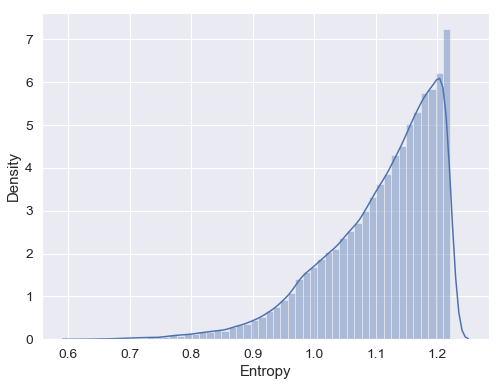

In [11]:
H = [torch.stack(x) for x in zip(*[sim_p(1.4).values() for _ in range(int(1e5))])]
ax = sns.distplot(H[0])
ax.set(xlabel="Entropy", ylabel="Density");

### Code 9.11

In [12]:
entropies = H[0]
distributions = H[1]

### Code 9.12

In [13]:
entropies.max()

tensor(1.2217)

### Code 9.13

In [14]:
distributions[entropies.argmax()]

tensor([0.0902, 0.2095, 0.2100, 0.4902])